In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 

import warnings  
warnings.filterwarnings('ignore') 

file_path = r"C:\Users\Hasan\Downloads\football-player-position.csv"
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Age,Height,Matches,Minutes/Match,Goals/Match,Assists/Match,Yellow Cards/Match,Red Cards/Match,Shots/Match,Pass Success Rate,Aerials Won,class
0,25.0,192.0,224.0,86.986607,0.049107,0.062500,0.187500,0.008929,0.5,85.3,2.2,Defender
1,27.0,189.0,67.0,69.343284,0.552239,0.134328,0.059701,0.000000,2.0,73.6,1.1,Forward
2,21.0,182.0,68.0,62.735294,0.191176,0.044118,0.073529,0.000000,1.7,83.8,0.3,Midfielder
3,25.0,189.0,58.0,89.017241,0.000000,0.000000,0.086207,0.000000,0.0,74.3,0.3,Goalkeeper
4,25.0,180.0,173.0,55.774566,0.075145,0.080925,0.144509,0.017341,0.9,82.4,0.3,Midfielder


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3611 non-null   float64
 1   Height              3611 non-null   float64
 2   Matches             3611 non-null   float64
 3   Minutes/Match       3611 non-null   float64
 4   Goals/Match         3611 non-null   float64
 5   Assists/Match       3611 non-null   float64
 6   Yellow Cards/Match  3611 non-null   float64
 7   Red Cards/Match     3611 non-null   float64
 8   Shots/Match         3611 non-null   float64
 9   Pass Success Rate   3611 non-null   float64
 10  Aerials Won         3611 non-null   float64
 11  class               3611 non-null   object 
dtypes: float64(11), object(1)
memory usage: 338.7+ KB


In [5]:
print(df.isnull().sum()) 


NameError: name 'df' is not defined

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index) 
plt.title("Sınıf (Mevki) Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Oyuncu Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [8]:
X = df.drop('class', axis=1)
y = df['class']


In [9]:
print(X.dtypes)


Age                   float64
Height                float64
Matches               float64
Minutes/Match         float64
Goals/Match           float64
Assists/Match         float64
Yellow Cards/Match    float64
Red Cards/Match       float64
Shots/Match           float64
Pass Success Rate     float64
Aerials Won           float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Defender': np.int64(0), 'Forward': np.int64(1), 'Goalkeeper': np.int64(2), 'Midfielder': np.int64(3)}


## K-FOLD CROSS ##

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama
scores = cross_val_score(rf, X, y_encoded, cv=5)

print("Her katın doğruluk skorları:", scores)
print("Ortalama doğruluk:", np.mean(scores))


Her katın doğruluk skorları: [0.84785615 0.86565097 0.85734072 0.81717452 0.79224377]
Ortalama doğruluk: 0.8360532254418531


<Figure size 800x500 with 0 Axes>

<BarContainer object of 5 artists>

(0.0, 1.0)

Text(0.5, 0, 'Fold (Katman) Sayısı')

Text(0, 0.5, 'Doğruluk Skoru')

Text(0.5, 1.0, '5 Katlı K-Fold Cross Validation Doğrulukları')

([<matplotlib.axis.XTick at 0x28b56d5c890>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

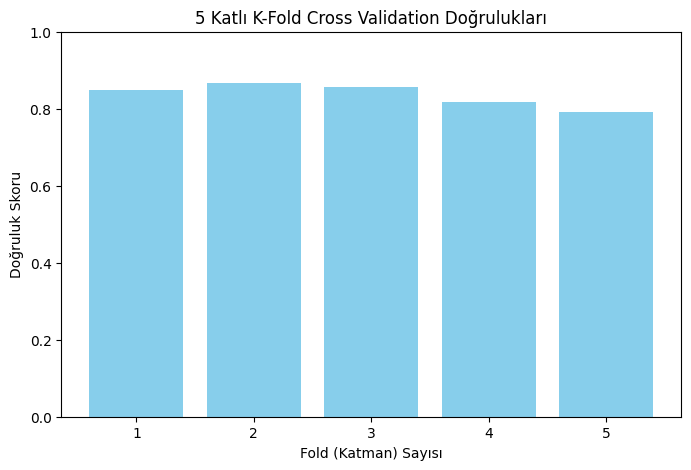

In [12]:
folds = range(1, 6)  # 1’den 5’e kadar katman numaraları

plt.figure(figsize=(8, 5))
plt.bar(folds, scores, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Fold (Katman) Sayısı')
plt.ylabel('Doğruluk Skoru')
plt.title('5 Katlı K-Fold Cross Validation Doğrulukları')
plt.xticks(folds)
plt.show()

In [ ]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y_encoded)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest Özellik Önemleri')

Text(0, 0.5, 'Önem Seviyesi')

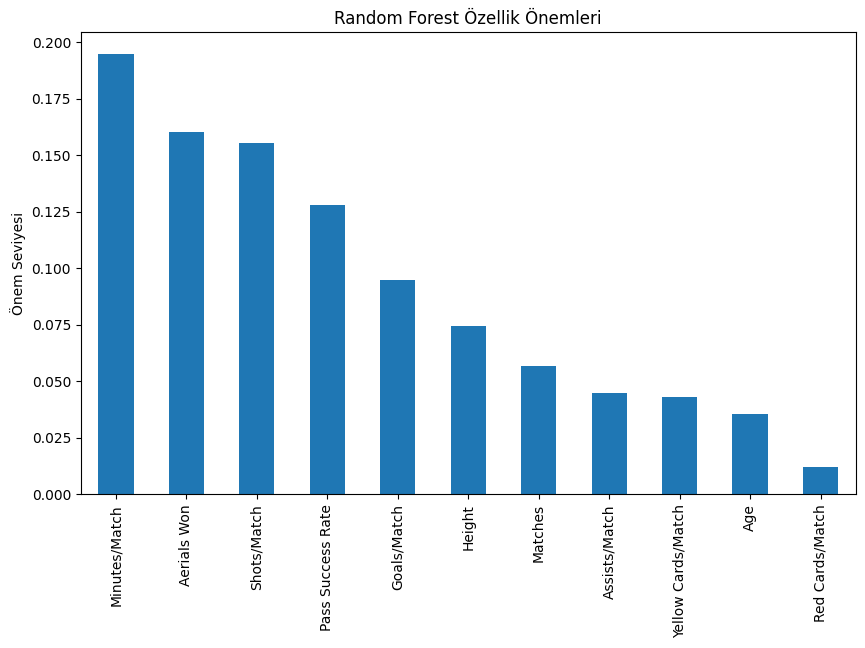

In [ ]:
# Özellik isimlerini ve önemlerini eşleştir
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# En önemli özellikleri sırala
feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Random Forest Özellik Önemleri')
plt.ylabel('Önem Seviyesi')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=42)


param_grid = {
 'n_estimators': [100, 200, 300],  # Aşırı büyük değerler yerine orta seviyeli değerler /50 denendi
    'max_depth': [5, 6, 7],         # None (sınırsız) yerine makul derinlikler /4-10 denendi
    'min_samples_split': [15, 20],  # Daha yüksek değerlerle ağaçların karmaşıklığını azalt /5-10 denendi
    'min_samples_leaf': [6, 8, 10],    # Yaprak düğümlerinde minimum örnek sayısını artır 1-2-5-10 denendi /2-4 denendi
    'max_features': ['sqrt', 0.6],  # Özellik seçimini daha tutucu yap (0.5 yerine) /0.5 denendi-log2 denendi
    'bootstrap': [True],              # Bootstrap örnekleme kullanarak çeşitliliği artır
    'max_samples': [0.7, 0.75],  # 0.8 denendi
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X, y_encoded)
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [5, 6, ...], 'max_features': ['sqrt', 0.6], 'max_samples': [0.7, 0.75], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


En iyi parametreler: {'bootstrap': True, 'max_depth': 7, 'max_features': 0.6, 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 200}
En iyi doğruluk: 0.834116082956901


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [ ]:
best_rf = RandomForestClassifier(
    max_depth= 7, #ağaçların max derinliği
    max_features=0.6,  #her bölünmede kullanılacak max özellik sqrt karekök
    min_samples_leaf= 6, #bir yaprak düğümde olması gereken min örnek
    min_samples_split= 20, #bir düğümün bölünmesi için geeken min örnek
    n_estimators=200, #oluşacak ağaç sayısı
    max_samples=0.7, #eğitim için kullanılacak örnek oranı
    random_state=42
)
best_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,7
,min_samples_split,20
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,0.6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

# Performans raporu
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test seti doğruluğu: {accuracy:.4f}")

# Karışıklık matrisi
#Precision (Kesinlik): Doğru tahmin edilen pozitifler / Toplam pozitif tahmin

#Formül: TP / (TP + FP)

#Recall (Duyarlılık): Doğru tahmin edilen pozitifler / Gerçek pozitifler

#Formül: TP / (TP + FN)

#F1-Score: Precision ve Recall'un harmonik ortalaması

#Formül: 2 * (Precision * Recall) / (Precision + Recall)

#Support: Her sınıftaki gerçek örnek sayısı
cm = confusion_matrix(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       217
           1       0.83      0.67      0.74       127
           2       0.99      0.96      0.97        78
           3       0.79      0.87      0.83       301

    accuracy                           0.83       723
   macro avg       0.86      0.83      0.84       723
weighted avg       0.83      0.83      0.83       723

Test seti doğruluğu: 0.8326


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Tahmin Edilen Sınıf')

Text(70.72222222222221, 0.5, 'Gerçek Sınıf')

Text(0.5, 1.0, 'Random Forest - Confusion Matrix')

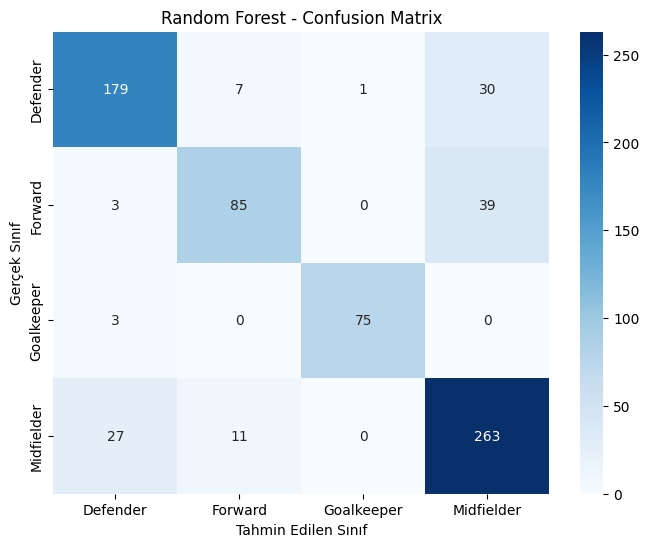

In [126]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Random Forest - Confusion Matrix')
plt.show()

In [118]:
# Örnek yeni veri (tek bir oyuncu)
new_player = np.array([[29, 190, 75, 76, 0.0057, 0.0423, 0.23, 0.0045, 1.3, 43, 0.8]])

# Yeni oyuncu pozisyon tahmini
predicted_class_index = best_rf.predict(new_player)
predicted_class_name = le.inverse_transform(predicted_class_index)
print("Tahmin edilen mevki:", predicted_class_name[0])


Tahmin edilen mevki: Midfielder


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Öğrenme Eğrisi - Random Forest')

Text(0.5, 0, 'Eğitim Seti Büyüklüğü')

Text(0, 0.5, 'Doğruluk')

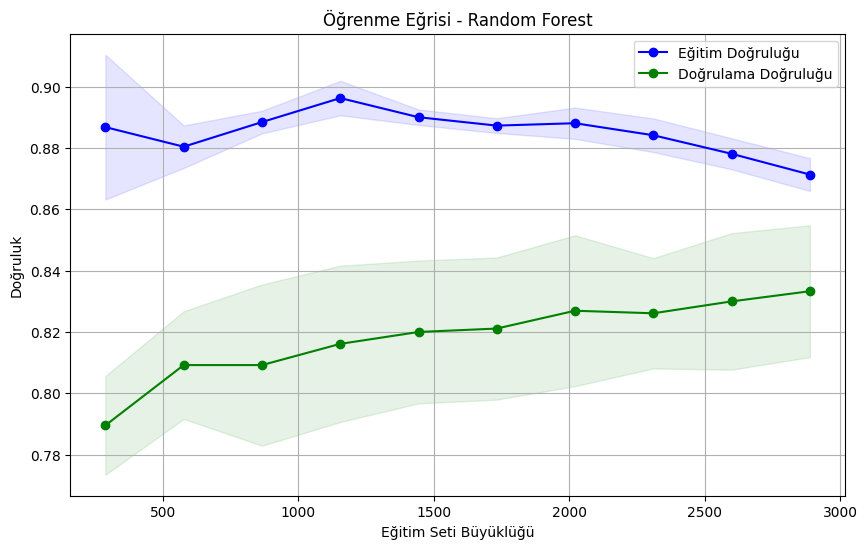

In [ ]:
from sklearn.model_selection import learning_curve

rf_for_learning_curve = RandomForestClassifier(
    max_depth= 7,
    max_features=0.6,
    min_samples_leaf= 6,
    min_samples_split= 20,
    n_estimators=200,
    max_samples=0.7,
    random_state=42
    
)

train_sizes, train_scores, valid_scores = learning_curve(
    #modelin farklı eğitim seti boyutlarında hesaplanması
    rf_for_learning_curve, X, y_encoded,
    cv=5,#beş katlı çapraz doğrulama
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), #%10 dan %100 e kadar deneme
    n_jobs=-1, #tüm cpu çekirdeklerini kullan
    random_state=42
)

train_mean = np.mean(train_scores, axis=1) #axis 1 hepsinde ortalama al
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Eğitim Doğruluğu')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Doğrulama Doğruluğu')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color='green')

plt.title('Öğrenme Eğrisi - Random Forest')
plt.xlabel('Eğitim Seti Büyüklüğü')
plt.ylabel('Doğruluk')
plt.legend(loc='best')
plt.grid()
plt.show()